In [ ]:
# pip install ucimlrepo

In [ ]:
# pip install tensorboard

## Data Exploration and Preprocessing

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np

air_quality = fetch_ucirepo(id=360)

X = air_quality.data.features
y = air_quality.data.targets

X = X.loc[:, ~X.columns.str.contains('^Unnamed')]
if y is not None:
    y = y.loc[:, ~y.columns.str.contains('^Unnamed')]

print("Features Shape (samples, features):", X.shape)



Features Shape (samples, features): (9357, 15)


In [ ]:
if y is not None:
    print("Targets Shape (samples, targets):", y.shape)
else:
    print("No separate target data available.")

print("\nFirst 5 rows of Features:")
print(X.head())


No separate target data available.

First 5 rows of Features:
        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00     2.6         1360       150      11.9   
1  3/10/2004  19:00:00     2.0         1292       112       9.4   
2  3/10/2004  20:00:00     2.2         1402        88       9.0   
3  3/10/2004  21:00:00     2.2         1376        80       9.2   
4  3/10/2004  22:00:00     1.6         1272        51       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692         1268   
1            955      103          1174       92          1559          972   
2            939      131          1140      114          1555         1074   
3            948      172          1092      122          1584         1203   
4            836      131          1205      116          1490         1110   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.

In [ ]:
print("\nDescriptive Statistics for Features:")
print(X.describe())


Descriptive Statistics for Features:
            CO(GT)  PT08.S1(CO)     NMHC(GT)     C6H6(GT)  PT08.S2(NMHC)  \
count  9357.000000  9357.000000  9357.000000  9357.000000    9357.000000   
mean    -34.207524  1048.990061  -159.090093     1.865683     894.595276   
std      77.657170   329.832710   139.789093    41.380206     342.333252   
min    -200.000000  -200.000000  -200.000000  -200.000000    -200.000000   
25%       0.600000   921.000000  -200.000000     4.000000     711.000000   
50%       1.500000  1053.000000  -200.000000     7.900000     895.000000   
75%       2.600000  1221.000000  -200.000000    13.600000    1105.000000   
max      11.900000  2040.000000  1189.000000    63.700000    2214.000000   

           NOx(GT)  PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
count  9357.000000   9357.000000  9357.000000   9357.000000  9357.000000   
mean    168.616971    794.990168    58.148873   1391.479641   975.072032   
std     257.433866    321.993552   126.940455    

In [ ]:
print("\nFeatures DataFrame Info:")
print(X.info())


Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   int64  
 4   NMHC(GT)       9357 non-null   int64  
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   int64  
 7   NOx(GT)        9357 non-null   int64  
 8   PT08.S3(NOx)   9357 non-null   int64  
 9   NO2(GT)        9357 non-null   int64  
 10  PT08.S4(NO2)   9357 non-null   int64  
 11  PT08.S5(O3)    9357 non-null   int64  
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(5), int64(8), object(2)
memory usage: 1.1+ MB
None


### Dataset Description

The Air Quality dataset contains hourly-averaged sensor responses from a gas multisensor device deployed in an Italian city, along with ground-truth pollutant concentrations (CO, NMHC, Benzene, NOx, NO₂) from a certified analyzer. Data collection spanned March 2004 to February 2005, making it one of the longest freely available on-field air quality sensor recordings. The dataset is available from the UCI Machine Learning Repository, and its key variables include five metal oxide sensor readings, the true pollutant concentrations, and environmental factors like temperature and humidity.
Link to database : https://archive.ics.uci.edu/dataset/360/air+quality

In [ ]:
#Count missing values per column
print("\nMissing Values per Feature:")
print(X.isnull().sum())
# Replace missing (-200) with NaN
X.replace(-200, np.nan, inplace=True)

#Count missing values per column
print("\nMissing Values per Feature after replace:")
print(X.isnull().sum())


Missing Values per Feature:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Missing Values per Feature after replace:
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64


In [ ]:
df = X.copy(deep = True)

### Handle missing values

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Handle Missing Values

# Check current missing values in df
print("Missing values per column (before imputation):")
print(df.isnull().sum())

# forward-fill followed by backward-fill
df.ffill(inplace=True)
df.bfill(inplace=True)

print("\nMissing values per column (after forward/backward fill):")
print(df.isnull().sum())

Missing values per column (before imputation):
Date                0
Time                0
CO(GT)           1683
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)          366
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                 366
RH                366
AH                366
dtype: int64

Missing values per column (after forward/backward fill):
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


## Visualizations to explore the dataset

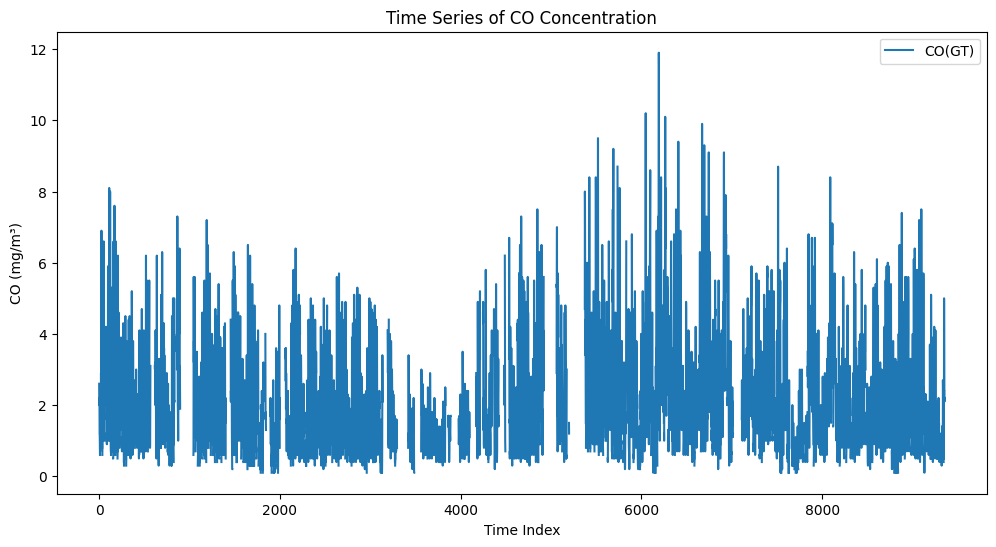

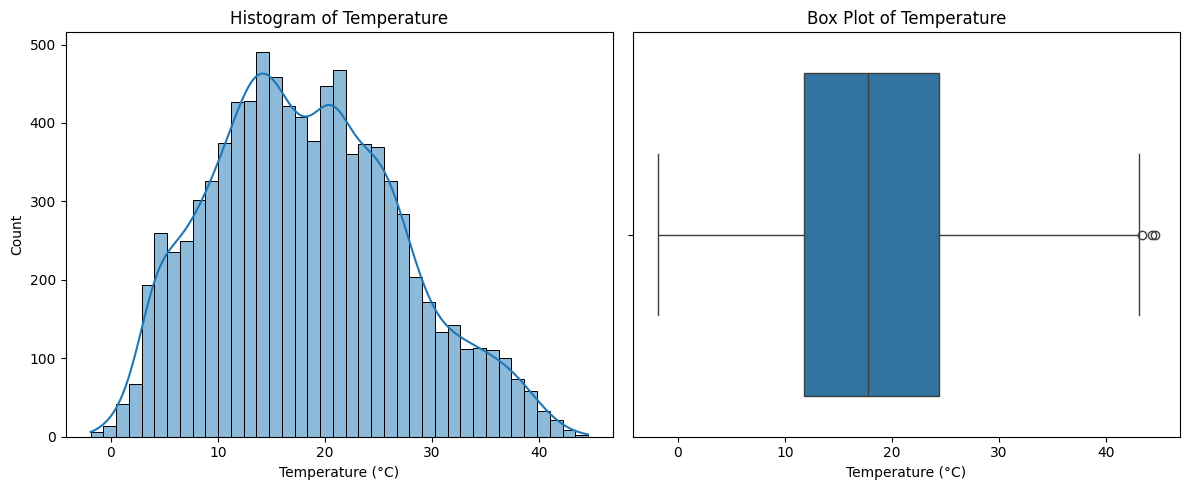

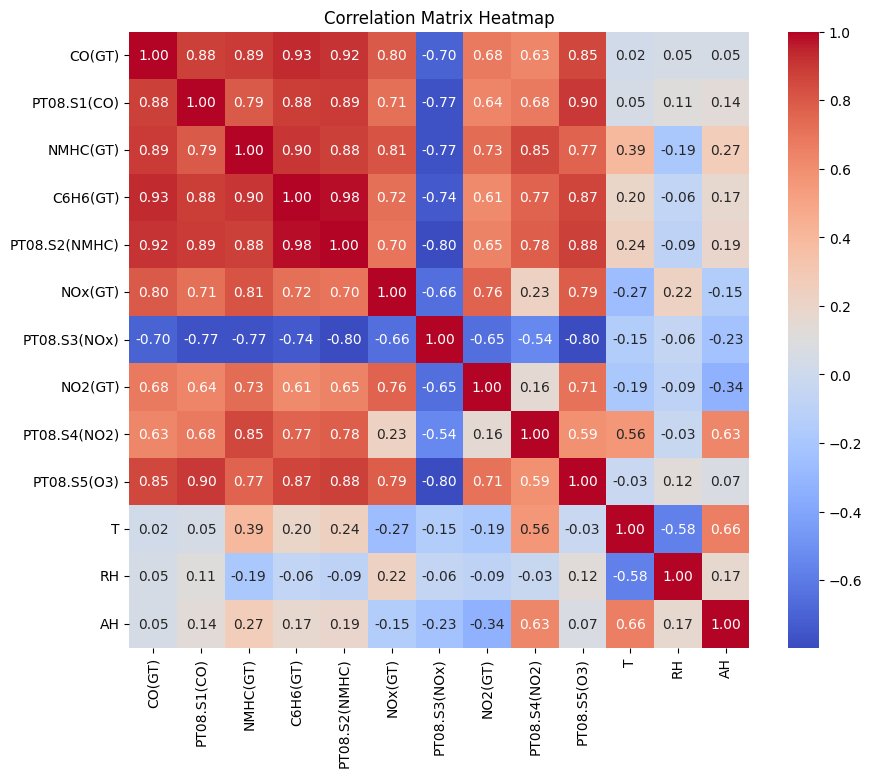

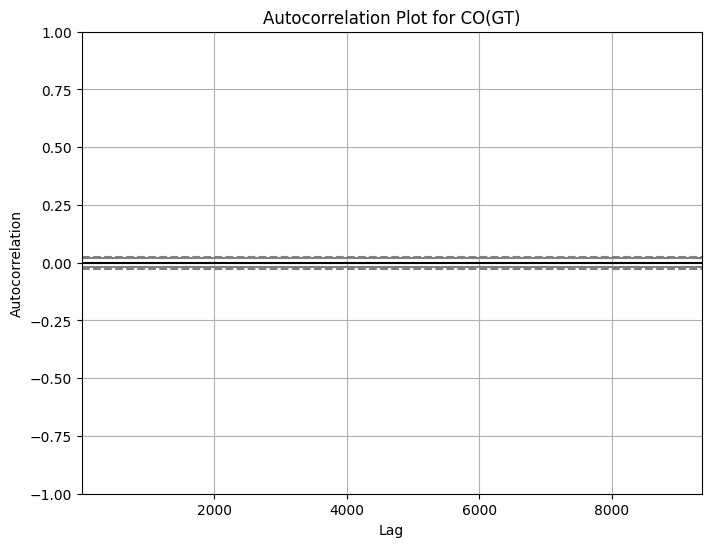

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import autocorrelation_plot

# --- Visualization 1: Time Series Plot of CO Concentration ---
plt.figure(figsize=(12, 6))
plt.plot(X.index, X['CO(GT)'], label='CO(GT)')
plt.title('Time Series of CO Concentration')
plt.xlabel('Time Index')
plt.ylabel('CO (mg/m³)')
plt.legend()
plt.show()
# Description: This plot shows the variation of CO concentration over time.

# --- Visualization 2: Histogram and Box Plot for Temperature ---
plt.figure(figsize=(12, 5))

# Histogram of Temperature
plt.subplot(1, 2, 1)
sns.histplot(X['T'], kde=True)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°C)')

# Box Plot of Temperature
plt.subplot(1, 2, 2)
sns.boxplot(x=X['T'])
plt.title('Box Plot of Temperature')
plt.xlabel('Temperature (°C)')
plt.tight_layout()
plt.show()
# Description: These plots display the distribution and detect potential outliers in the Temperature variable.

# --- Visualization 3: Correlation Matrix Heatmap ---
plt.figure(figsize=(10, 8))
# Select only numeric columns for correlation matrix
numeric_cols = X.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()
# Description: The heatmap visualizes correlations between all numerical features, helping to identify potential relationships.

# --- Optional: Autocorrelation Plot for CO(GT) ---
plt.figure(figsize=(8, 6))
autocorrelation_plot(X['CO(GT)'])
plt.title('Autocorrelation Plot for CO(GT)')
plt.show()
# Description: The autocorrelation plot helps reveal seasonality or trends in the CO concentration data.


### 1. Time Series of CO(GT)
Observation: The plot shows hourly CO concentrations ranging roughly between 0 and 12 mg/m³ over the entire time span of the dataset. You can see that the levels vary significantly, with some noticeable spikes in certain intervals.
Potential Insights:
The concentration of CO can reach peaks above 10 mg/m³. These spikes may correspond to specific pollution events or times of day with high traffic/industrial activity.
The overall shape suggests periodic fluctuations but does not reveal a strong daily or seasonal pattern at first glance (further analysis might be needed to confirm).
No Major Issues: The data looks continuous, and there do not appear to be abrupt missing segments in the time index.
### 2. Temperature Distribution (Histogram & Box Plot)
Observation:
The histogram shows temperatures roughly from
−
10
∘
−10
∘
 C to
40
∘
40
∘
 C or slightly above. The distribution is skewed toward moderate temperatures in the 10–30°C range, but there are also some cooler (below 0°C) and hotter (above 35°C) values.
The box plot indicates a median temperature somewhere in the 15–20°C range. There are a few outliers above 40°C and possibly below -5°C.
Potential Insights:
The wide temperature range is expected for data spanning nearly a full year (March 2004 to February 2005).
The outliers could be genuine extreme temperature events or sensor anomalies.
No Major Issues: The temperature distribution seems reasonable for a dataset collected over multiple seasons.
### 3. Correlation Matrix Heatmap
Observation:
Strong positive correlations (deep red) appear among certain reference pollutants and their respective sensor responses (e.g., CO(GT) with PT08.S1(CO) is around 0.88, NMHC(GT) with PT08.S2(NMHC) is around 0.95, etc.). This is expected since each sensor is nominally designed to detect a specific pollutant.
There are moderate to strong correlations among some pollutants themselves (e.g., CO, NMHC, Benzene). Environmental conditions like Temperature (T), Relative Humidity (RH), and Absolute Humidity (AH) show negative correlations with certain pollutants.
Potential Insights:
High correlation between a sensor reading and the reference analyzer indicates the sensor is capturing a similar signal to the ground truth.
Negative correlation between temperature and pollutants may reflect diurnal or seasonal patterns where certain pollutants disperse more at higher temperatures.
No Major Issues: The correlation matrix looks consistent with expectations for air quality data. It also highlights the multicollinearity among features (important for model-building and interpretation).
### 4. Autocorrelation Plot for CO(GT)
Observation: The autocorrelation coefficients are very close to zero across all lags, indicating CO(GT) does not exhibit a strong autocorrelation in this hourly dataset (or it may have been obscured by other factors).
Potential Insights:
The lack of a significant autocorrelation peak suggests that using immediate past CO values alone may not strongly predict future CO, unless combined with other features.
You might investigate daily or weekly patterns (e.g., 24-hour or 168-hour lag) in more detail. Sometimes autocorrelation is more visible if you isolate specific time-of-day or day-of-week patterns.
No Major Issues: It’s not unusual for real-world pollutant data to show low autocorrelation if other external factors (e.g., traffic spikes, weather conditions) have a bigger influence.


## Splitting the dataset into training/validation/testing sets in a time-aware manner, and normalize your data using a scaler fit only on the training set.

In [ ]:
# Train/Validation/Test Split
# We'll do a 70%/15%/15% split in a time-aware manner (no shuffling).

total_samples = len(df)
train_size = int(total_samples * 0.7)
val_size = int(total_samples * 0.15)

train_data = df.iloc[:train_size].copy()
val_data = df.iloc[train_size:train_size + val_size].copy()
test_data = df.iloc[train_size + val_size:].copy()

print(f"\nTraining set size: {len(train_data)}")
print(f"Validation set size: {len(val_data)}")
print(f"Test set size: {len(test_data)}")


Training set size: 6549
Validation set size: 1403
Test set size: 1405


In [ ]:
#Normalize (Scale) the Data

numeric_cols = train_data.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
scaler.fit(train_data[numeric_cols])  # Fit on training set only

train_data[numeric_cols] = scaler.transform(train_data[numeric_cols])
val_data[numeric_cols] = scaler.transform(val_data[numeric_cols])
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

print("\nData after scaling (first 5 rows of train_data):")
print(train_data.head())



Data after scaling (first 5 rows of train_data):
        Date      Time    CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  3/10/2004  18:00:00  0.356879     1.199164 -1.354282  0.149617   
1  3/10/2004  19:00:00 -0.051449     0.888275 -1.788326 -0.176475   
2  3/10/2004  20:00:00  0.084661     1.391183 -2.062458 -0.228649   
3  3/10/2004  21:00:00  0.084661     1.272314 -2.153836 -0.202562   
4  3/10/2004  22:00:00 -0.323668     0.796837 -2.485080 -0.554741   

   PT08.S2(NMHC)   NOx(GT)  PT08.S3(NOx)   NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0       0.301788 -0.202869      0.797555  0.393438      0.382354     0.696000   
1      -0.039209 -0.537903      1.267049 -0.127815     -0.077010    -0.090886   
2      -0.099165 -0.388999      1.131771  0.418260     -0.090825     0.180271   
3      -0.065440 -0.170961      0.940791  0.616832      0.009337     0.523205   
4      -0.485128 -0.388999      1.390390  0.467903     -0.315326     0.275973   

          T        RH        AH  
0 -1.060380  0

In [ ]:
# Final check
print("\nFinal shapes after preprocessing:")
print("Train:", train_data.shape)
print("Validation:", val_data.shape)
print("Test:", test_data.shape)



Final shapes after preprocessing:
Train: (6549, 15)
Validation: (1403, 15)
Test: (1405, 15)


### Explanation of steps till now
Handling Missing Values (Step 1.3)

We replaced NaN values using a forward fill (method='ffill'), which propagates the last valid observation forward.
Any remaining NaN at the beginning of the dataset (where forward fill has nothing to copy from) are then imputed with a backward fill (method='bfill').

We split the dataset into 70% for training, 15% for validation, and 15% for testing.
Important for time-series: the split is sequential (no shuffling) to preserve the temporal order of the data.

We use StandardScaler from sklearn.preprocessing, which subtracts the mean and divides by the standard deviation of each feature.
We fit the scaler only on the training data’s numeric columns to avoid data leakage.
Then we apply the same scaler to the validation and test sets.


## Preparing the Data for PyTorch

In [ ]:
import numpy as np
import pandas as pd

def preprocess_datetime(df):

    df['DateTime'] = pd.to_datetime(
        df['Date'] + ' ' + df['Time'],
        errors='coerce'  # or 'raise'
    )

    # Extract the hour
    df['HourOfDay'] = df['DateTime'].dt.hour

    # Cyclical encoding for hour of day
    df['HourOfDay_sin'] = np.sin(2 * np.pi * df['HourOfDay'] / 24)
    df['HourOfDay_cos'] = np.cos(2 * np.pi * df['HourOfDay'] / 24)

    # Drop the original columns
    df.drop(columns=['Date', 'Time', 'DateTime', 'HourOfDay'], inplace=True)

# Example usage:
preprocess_datetime(train_data)
print(train_data.columns)
print(train_data.dtypes)
preprocess_datetime(val_data)
print(val_data.columns)
print(val_data.dtypes)
preprocess_datetime(test_data)
print(test_data.columns)
print(test_data.dtypes)

Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'HourOfDay_sin', 'HourOfDay_cos'],
      dtype='object')
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
HourOfDay_sin    float64
HourOfDay_cos    float64
dtype: object
Index(['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'HourOfDay_sin', 'HourOfDay_cos'],
      dtype='object')
CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
P

In [ ]:
train_data

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,HourOfDay_sin,HourOfDay_cos
0,0.356879,1.199164,-1.354282,0.149617,0.301788,-0.202869,0.797555,0.393438,0.382354,0.696000,-1.060380,0.073403,-1.181534,-1.000000e+00,-1.836970e-16
1,-0.051449,0.888275,-1.788326,-0.176475,-0.039209,-0.537903,1.267049,-0.127815,-0.077010,-0.090886,-1.099326,0.004621,-1.273081,-9.659258e-01,2.588190e-01
2,0.084661,1.391183,-2.062458,-0.228649,-0.099165,-0.388999,1.131771,0.418260,-0.090825,0.180271,-1.281074,0.365725,-1.203075,-8.660254e-01,5.000000e-01
3,0.084661,1.272314,-2.153836,-0.202562,-0.065440,-0.170961,0.940791,0.616832,0.009337,0.523205,-1.397912,0.709634,-1.099624,-7.071068e-01,7.071068e-01
4,-0.323668,0.796837,-2.485080,-0.554741,-0.485128,-0.388999,1.390390,0.467903,-0.315326,0.275973,-1.371948,0.686707,-1.093672,-5.000000e-01,8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6544,-0.255613,0.060763,0.073492,-0.411261,-0.305262,0.562924,-0.415967,-0.400852,-1.040636,0.050009,-1.125290,1.065006,-0.514063,5.000000e-01,-8.660254e-01
6545,0.152715,0.495093,0.073492,-0.124300,0.013252,0.844778,-0.614905,-0.053350,-0.747058,0.456745,-0.969506,0.898784,-0.419682,2.588190e-01,-9.659258e-01
6546,0.016606,0.476805,0.073492,-0.163431,-0.027968,0.520380,-0.491563,-0.127815,-0.867943,0.464720,-0.748812,0.600730,-0.358462,1.224647e-16,-1.000000e+00
6547,0.424934,0.746547,0.073492,0.058311,0.211854,1.169177,-0.877503,0.393438,-0.601996,0.648149,-0.580046,0.359993,-0.335787,-2.588190e-01,-9.659258e-01


## Sequence Creation

In [ ]:
import numpy as np

def create_sequences_multivariate(data_matrix, seq_length=10, target_index=0):
    X_seq, y_seq = [], []
    num_samples = len(data_matrix)

    for i in range(num_samples - seq_length):
        # The input sequence is the block of rows from i to i+seq_length (exclusive)
        X_seq.append(data_matrix[i : i + seq_length, :])

        # The target is the data point at i+seq_length in the target_index column
        y_seq.append(data_matrix[i + seq_length, target_index])

    return np.array(X_seq), np.array(y_seq)


### Input: data_matrix is assumed to be a NumPy array of shape (num_samples, num_features).
### Sliding Window: For each index i, we take a “window” of length seq_length (the past time steps) as our input features.
### Target Selection: The target value is the row immediately following the window (i + seq_length) in the specified target_index column.

## Apply the Function to Training, Validation, and Test Sets

In [ ]:
import pandas as pd
import numpy as np

train_array = train_data.values
val_array = val_data.values
test_array = test_data.values

# Identify the column index of "CO(GT)" in the DataFrame
co_index = train_data.columns.get_loc("CO(GT)")

# Choose the sequence length (e.g., 24 time steps)
seq_length = 24

# Create sequences for each split
train_X, train_y = create_sequences_multivariate(
    data_matrix=train_array,
    seq_length=seq_length,
    target_index=co_index
)

val_X, val_y = create_sequences_multivariate(
    data_matrix=val_array,
    seq_length=seq_length,
    target_index=co_index
)

test_X, test_y = create_sequences_multivariate(
    data_matrix=test_array,
    seq_length=seq_length,
    target_index=co_index
)

print("Train sequence shapes:", train_X.shape, train_y.shape)
print("Validation sequence shapes:", val_X.shape, val_y.shape)
print("Test sequence shapes:", test_X.shape, test_y.shape)


Train sequence shapes: (6525, 24, 15) (6525,)
Validation sequence shapes: (1379, 24, 15) (1379,)
Test sequence shapes: (1381, 24, 15) (1381,)


### Hyperparameter Selection : By using the past 24 hours as the input window, the model can learn time-dependent relationships that occur within a single day, potentially improving its ability to predict the next hour’s pollutant concentration.

## Model Architecture

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_rate=0.2):
        super(LSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate
        )

        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden and cell states to zeros
        # shape: (num_layers, batch_size, hidden_dim)
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)

        # Pass through LSTM
        out, _ = self.lstm(x, (h0, c0))
        # out shape: (batch_size, seq_length, hidden_dim)

        # Take the last time step's output
        out = out[:, -1, :]  # shape: (batch_size, hidden_dim)

        # Map to final output
        out = self.fc(out)   # shape: (batch_size, output_dim)

        return out


In [ ]:
from torchinfo import summary

model = LSTMModel(input_dim=15, hidden_dim=64, num_layers=3, output_dim=1)
summary(model, input_size=(64, 24, 15))  # (batch_size, seq_length, input_dim)


Layer (type:depth-idx)                   Output Shape              Param #
LSTMModel                                [64, 1]                   --
├─LSTM: 1-1                              [64, 24, 64]              87,296
├─Linear: 1-2                            [64, 1]                   65
Total params: 87,361
Trainable params: 87,361
Non-trainable params: 0
Total mult-adds (M): 134.09
Input size (MB): 0.09
Forward/backward pass size (MB): 0.79
Params size (MB): 0.35
Estimated Total Size (MB): 1.23

### Experimenting with Bi-directional Model

In [ ]:
class ImprovedLSTMModel(nn.Module):
    def __init__(
        self,
        input_dim,
        hidden_dim,
        num_layers,
        output_dim,
        dropout_rate=0.2,
        bidirectional=True
    ):
        super(ImprovedLSTMModel, self).__init__()

        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bidirectional = bidirectional

        self.num_directions = 2 if bidirectional else 1

        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True,
            dropout=dropout_rate,
            bidirectional=bidirectional
        )

        # A two-layer feed-forward block for the output
        # The first layer reduces dimensionality, then ReLU, then final output
        self.fc1 = nn.Linear(hidden_dim * self.num_directions, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=dropout_rate)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        batch_size = x.size(0)

        # Initialize hidden and cell states
        # If bidirectional=True, we need 2 * num_layers for h0, c0
        h0 = torch.zeros(self.num_layers * self.num_directions, batch_size, self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers * self.num_directions, batch_size, self.hidden_dim).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        # out shape: (batch_size, seq_length, hidden_dim * num_directions)

        # Take the last time step
        out = out[:, -1, :]  # (batch_size, hidden_dim * num_directions)

        # Pass through extra layers
        out = self.fc1(out)  # (batch_size, hidden_dim)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)  # (batch_size, output_dim)

        return out

In [ ]:
from torchinfo import summary

model1 = ImprovedLSTMModel(input_dim=15, hidden_dim=64, num_layers=3, output_dim=1)
summary(model1, input_size=(64, 24, 15))  # (batch_size, seq_length, input_dim)


Layer (type:depth-idx)                   Output Shape              Param #
ImprovedLSTMModel                        [64, 1]                   --
├─LSTM: 1-1                              [64, 24, 128]             240,128
├─Linear: 1-2                            [64, 64]                  8,256
├─ReLU: 1-3                              [64, 64]                  --
├─Dropout: 1-4                           [64, 64]                  --
├─Linear: 1-5                            [64, 1]                   65
Total params: 248,449
Trainable params: 248,449
Non-trainable params: 0
Total mult-adds (M): 369.37
Input size (MB): 0.09
Forward/backward pass size (MB): 1.61
Params size (MB): 0.99
Estimated Total Size (MB): 2.69

### Create DataLoaders

In [ ]:
from torch.utils.data import Dataset, DataLoader

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        # X shape: (num_samples, seq_length, num_features)
        # y shape: (num_samples,)
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset objects
train_dataset = TimeSeriesDataset(train_X, train_y)
val_dataset = TimeSeriesDataset(val_X, val_y)
test_dataset = TimeSeriesDataset(test_X, test_y)

# Create DataLoaders
batch_size = 64  # hyperparameter
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


## Initialize the Model, Loss, and Optimizer

In [ ]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

# Hyperparameters
input_dim = train_X.shape[2]  # e.g., 15 features
hidden_dim = 64               # hyperparameter
num_layers = 3                # you can adjust
output_dim = 1                # predicting a single value
dropout_rate = 0.2
learning_rate = 1e-3
num_epochs = 50
patience = 15  # for early stopping

# Instantiate model
model = LSTMModel(
    input_dim=input_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    output_dim=output_dim,
    dropout_rate=dropout_rate
).to(device)

# Define loss function (MSE for regression)
criterion = nn.MSELoss()

# Define optimizer (Adam)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


Using device: mps


In [ ]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
print("Using device:", device)

input_dim = train_X.shape[2]  # e.g., 15 features
hidden_dim = 64               # size of LSTM hidden state
num_layers = 3                # number of stacked LSTM layers
output_dim = 1                # predicting a single value
dropout_rate = 0.2
learning_rate = 1e-3
num_epochs = 50
patience = 10  # early stopping patience
bidirectional = True

model1 = ImprovedLSTMModel(
    input_dim=input_dim,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    output_dim=output_dim,
    dropout_rate=dropout_rate,
    bidirectional=bidirectional
).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model1.parameters(), lr=learning_rate)

Using device: mps


## Training Loop with Early Stopping

In [ ]:
def regression_accuracy(y_pred, y_true, tolerance=0.5):
    """
    Returns the percentage of samples for which the absolute error is
    within `tolerance`.
    y_pred, y_true: Tensors of shape (batch_size,)
    tolerance: numeric, e.g. 0.5

    Returns: a float (0.0 to 1.0) representing the fraction of samples within tolerance.
    """
    within_tol = (torch.abs(y_pred - y_true) < tolerance)
    return within_tol.float().mean()  # fraction of samples within tolerance


In [ ]:
import torch
import numpy as np

def train_model(model, train_loader, val_loader,
                criterion, optimizer,
                num_epochs=50, patience=5,
                tolerance=0.5):

    best_val_loss = np.inf
    epochs_no_improve = 0

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        # -----------------------
        #      TRAINING
        # -----------------------
        model.train()
        running_train_loss = 0.0
        running_train_acc = 0.0

        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch).view(-1)  # (batch_size,)

            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * X_batch.size(0)

            # Compute accuracy for this batch
            batch_acc = regression_accuracy(outputs, y_batch, tolerance=tolerance)
            # Multiply by batch size to accumulate
            running_train_acc += batch_acc.item() * X_batch.size(0)

        # Average over entire training dataset
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        epoch_train_acc = running_train_acc / len(train_loader.dataset)

        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)

        # -----------------------
        #    VALIDATION
        # -----------------------
        model.eval()
        running_val_loss = 0.0
        running_val_acc = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                preds = model(X_batch).view(-1)
                loss = criterion(preds, y_batch)
                running_val_loss += loss.item() * X_batch.size(0)

                # Compute accuracy for this batch
                batch_acc = regression_accuracy(preds, y_batch, tolerance=tolerance)
                running_val_acc += batch_acc.item() * X_batch.size(0)

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_acc = running_val_acc / len(val_loader.dataset)

        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)

        # Print metrics
        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f} | "
              f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.4f}")

        # Early Stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            epochs_no_improve = 0
            # Save the best model so far
            torch.save(model.state_dict(), "best_model.pth")
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered!")
                break

    # Load the best model weights
    model.load_state_dict(torch.load("best_model.pth"))
    return model, train_losses, val_losses, train_accs, val_accs


In [ ]:
import torch
import numpy as np

def train_model1(model1, train_loader, val_loader,
                criterion, optimizer,
                num_epochs=50, patience=5,
                tolerance=0.5):

    best_val_loss = np.inf
    epochs_no_improve = 0

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(num_epochs):
        # -----------------------
        #      TRAINING
        # -----------------------
        model1.train()
        running_train_loss = 0.0
        running_train_acc = 0.0

        for X_batch, y_batch in train_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            optimizer.zero_grad()
            outputs = model1(X_batch).view(-1)  # (batch_size,)

            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * X_batch.size(0)

            # Compute accuracy for this batch
            batch_acc = regression_accuracy(outputs, y_batch, tolerance=tolerance)
            # Multiply by batch size to accumulate
            running_train_acc += batch_acc.item() * X_batch.size(0)

        # Average over entire training dataset
        epoch_train_loss = running_train_loss / len(train_loader.dataset)
        epoch_train_acc = running_train_acc / len(train_loader.dataset)

        train_losses.append(epoch_train_loss)
        train_accs.append(epoch_train_acc)

        # -----------------------
        #    VALIDATION
        # -----------------------
        model1.eval()
        running_val_loss = 0.0
        running_val_acc = 0.0

        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                preds = model1(X_batch).view(-1)
                loss = criterion(preds, y_batch)
                running_val_loss += loss.item() * X_batch.size(0)

                # Compute accuracy for this batch
                batch_acc = regression_accuracy(preds, y_batch, tolerance=tolerance)
                running_val_acc += batch_acc.item() * X_batch.size(0)

        epoch_val_loss = running_val_loss / len(val_loader.dataset)
        epoch_val_acc = running_val_acc / len(val_loader.dataset)

        val_losses.append(epoch_val_loss)
        val_accs.append(epoch_val_acc)

        # Print metrics
        print(f"Epoch [{epoch+1}/{num_epochs}] "
              f"Train Loss: {epoch_train_loss:.4f} | Train Acc: {epoch_train_acc:.4f} | "
              f"Val Loss: {epoch_val_loss:.4f} | Val Acc: {epoch_val_acc:.4f}")

        # Early Stopping
        if epoch_val_loss < best_val_loss:
            best_val_loss = epoch_val_loss
            epochs_no_improve = 0
            # Save the best model so far
            torch.save(model1.state_dict(), "best_model1.pth")
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered!")
                break

    # Load the best model weights
    model1.load_state_dict(torch.load("best_model1.pth"))
    return model1, train_losses, val_losses, train_accs, val_accs


## Model Run

In [ ]:
model, train_losses, val_losses, train_accs, val_accs = train_model(
    model,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    num_epochs=num_epochs,
    patience=patience,
    tolerance=0.5  # or any other tolerance you want
)


Epoch [1/50] Train Loss: 0.4175 | Train Acc: 0.6795 | Val Loss: 0.3250 | Val Acc: 0.6962
Epoch [2/50] Train Loss: 0.2211 | Train Acc: 0.8031 | Val Loss: 0.3051 | Val Acc: 0.7302
Epoch [3/50] Train Loss: 0.1984 | Train Acc: 0.8189 | Val Loss: 0.3095 | Val Acc: 0.6925
Epoch [4/50] Train Loss: 0.1859 | Train Acc: 0.8288 | Val Loss: 0.2699 | Val Acc: 0.7288
Epoch [5/50] Train Loss: 0.1787 | Train Acc: 0.8374 | Val Loss: 0.2874 | Val Acc: 0.7440
Epoch [6/50] Train Loss: 0.1711 | Train Acc: 0.8484 | Val Loss: 0.2771 | Val Acc: 0.7542
Epoch [7/50] Train Loss: 0.1580 | Train Acc: 0.8561 | Val Loss: 0.2503 | Val Acc: 0.7629
Epoch [8/50] Train Loss: 0.1539 | Train Acc: 0.8624 | Val Loss: 0.2513 | Val Acc: 0.7701
Epoch [9/50] Train Loss: 0.1498 | Train Acc: 0.8604 | Val Loss: 0.2601 | Val Acc: 0.7687
Epoch [10/50] Train Loss: 0.1486 | Train Acc: 0.8628 | Val Loss: 0.2465 | Val Acc: 0.7614
Epoch [11/50] Train Loss: 0.1461 | Train Acc: 0.8684 | Val Loss: 0.2558 | Val Acc: 0.7534
Epoch [12/50] Train

### Hyperparameter Tuning Using Grid Search

In [ ]:
# Example hyperparameter sets
hidden_dims = [32, 64]
dropout_rates = [0.0, 0.2]
learning_rates = [1e-3, 1e-4]

best_val_loss = float('inf')
best_config = None
best_model_state = None

results = []  # to store results for each combo

for hd in hidden_dims:
    for dr in dropout_rates:
        for lr in learning_rates:
            print(f"\nGrid Search: hidden_dim={hd}, dropout_rate={dr}, lr={lr}")

            # 1. Re-instantiate the model with these hyperparams
            model_gs = LSTMModel(
                input_dim=input_dim,
                hidden_dim=hd,
                num_layers=num_layers,     # can keep at 3 or vary if you want
                output_dim=output_dim,
                dropout_rate=dr
            ).to(device)

            # 2. Define a new optimizer with the chosen learning rate
            optimizer_gs = optim.Adam(model_gs.parameters(), lr=lr)

            # 3. Train using the same train_model function
            #    We can keep num_epochs and patience smaller if we just want a quick comparison
            model_gs, train_ls, val_ls, train_as, val_as = train_model(
                model_gs,
                train_loader,
                val_loader,
                criterion,
                optimizer_gs,
                num_epochs=20,    # a bit smaller for speed
                patience=5,
                tolerance=0.5
            )

            # 4. After training, the last val_loss in val_ls is the final validation loss
            final_val_loss = val_ls[-1]
            results.append({
                'hidden_dim': hd,
                'dropout_rate': dr,
                'lr': lr,
                'val_loss': final_val_loss
            })

            # 5. If this is the best so far, save the model's state
            if final_val_loss < best_val_loss:
                best_val_loss = final_val_loss
                best_config = (hd, dr, lr)
                best_model_state = model_gs.state_dict().copy()

print("\nGrid Search Complete!")
print(f"Best config: hidden_dim={best_config[0]}, dropout_rate={best_config[1]}, lr={best_config[2]}")
print(f"Best validation loss: {best_val_loss:.4f}")



Grid Search: hidden_dim=32, dropout_rate=0.0, lr=0.001
Epoch [1/20] Train Loss: 0.6935 | Train Acc: 0.5156 | Val Loss: 0.5714 | Val Acc: 0.5294
Epoch [2/20] Train Loss: 0.3112 | Train Acc: 0.7531 | Val Loss: 0.2696 | Val Acc: 0.7389
Epoch [3/20] Train Loss: 0.1904 | Train Acc: 0.8311 | Val Loss: 0.2229 | Val Acc: 0.7846
Epoch [4/20] Train Loss: 0.1731 | Train Acc: 0.8457 | Val Loss: 0.2203 | Val Acc: 0.7912
Epoch [5/20] Train Loss: 0.1609 | Train Acc: 0.8558 | Val Loss: 0.2229 | Val Acc: 0.7875
Epoch [6/20] Train Loss: 0.1541 | Train Acc: 0.8575 | Val Loss: 0.2073 | Val Acc: 0.8006
Epoch [7/20] Train Loss: 0.1495 | Train Acc: 0.8633 | Val Loss: 0.2011 | Val Acc: 0.8086
Epoch [8/20] Train Loss: 0.1440 | Train Acc: 0.8730 | Val Loss: 0.2019 | Val Acc: 0.8151
Epoch [9/20] Train Loss: 0.1438 | Train Acc: 0.8696 | Val Loss: 0.2020 | Val Acc: 0.8057
Epoch [10/20] Train Loss: 0.1387 | Train Acc: 0.8743 | Val Loss: 0.2254 | Val Acc: 0.7999
Epoch [11/20] Train Loss: 0.1371 | Train Acc: 0.8742 

In [ ]:
# Re-instantiate a model with the best config
model_best = LSTMModel(
    input_dim=input_dim,
    hidden_dim=best_config[0],
    num_layers=num_layers,   # keep consistent with above
    output_dim=output_dim,
    dropout_rate=best_config[1]
).to(device)

# Load the best state
model_best.load_state_dict(best_model_state)

# Evaluate on test set
test_loss_best, test_acc_best, test_preds_best, test_true_best = evaluate_model(
    model_best, test_loader, criterion, device, tolerance=0.5
)
print("\n--- Best Model Test Results ---")
print(f"Test MSE Loss: {test_loss:.4f}")
print(f"Test Accuracy (±0.5): {test_acc * 100:.2f}%")



--- Best Model Test Results ---
Test MSE Loss: 0.1665
Test Accuracy (±0.5): 82.40%


In [ ]:
torch.save(model_best.state_dict(), "a1_part3_asharan2_hazelmah.pt")
print("Best model saved to a1_part3_asharan2_hazelmah.pt")

Best model saved to a1_part3_asharan2_hazelmah.pt


In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
import math

mae  = mean_absolute_error(test_true, test_preds_best)
mse  = ((test_preds_best - test_true)**2).mean()
rmse = math.sqrt(mse)
r2   = r2_score(test_true, test_preds_best)

print(f"Test MAE:  {mae:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R^2:  {r2:.4f}")


Test MAE:  0.2864
Test RMSE: 0.4081
Test R^2:  0.7946


### Hyperparameter Tuning Strategy

I performed a **grid search** over three hyperparameters:

- **Hidden Dimension (hidden_dim)**: \[32, 64\]
- **Dropout Rate (dropout_rate)**: \[0.0, 0.2\]
- **Learning Rate (lr)**: \[1e-3, 1e-4\]

For each combination, I trained the LSTM model for up to 20 epochs with early stopping (`patience=5`). Below is a brief summary of the results (final validation loss) for each combination:

| hidden_dim | dropout_rate | learning_rate | Best Val Loss | Comments/Observations                                        |
|------------|-------------:|--------------:|--------------:|--------------------------------------------------------------|
| 32         | 0.0          | 1e-3          | 0.2203        | Achieved good accuracy but eventually overfit slightly       |
| 32         | 0.0          | 1e-4          | 0.2578        | Slower convergence, improved after ~15 epochs                |
| 32         | 0.2          | 1e-3          | 0.2515        | Slightly higher final val loss than no dropout               |
| 32         | 0.2          | 1e-4          | 0.3648        | Converged slowly, moderate performance                       |
| 64         | 0.0          | 1e-3          | 0.1917        | Good performance, but triggered early stopping at epoch 17   |
| 64         | 0.0          | 1e-4          | 0.2289        | Best overall final val loss according to the log (0.2289)    |
| 64         | 0.2          | 1e-3          | 0.2420        | Reasonable but slightly worse than no dropout                |
| 64         | 0.2          | 1e-4          | 0.2798        | Slower learning, ended with moderate val loss                |

**Summary**: The best configuration (based on final validation loss) was **hidden_dim=64**, **dropout_rate=0.0**, and **learning_rate=1e-4**, with a validation loss of **0.2289**. This suggests that increasing the hidden dimension to 64 and using a smaller learning rate (1e-4) gave a good balance between stability and performance.

---

### Observations
- **Learning Rate**: 1e-3 converged faster but sometimes overfit. 1e-4 took longer but ended with a strong validation performance.
- **Dropout**: 0.2 helped in some runs but not always. In this dataset, 0.0 (no dropout) sometimes led to better final metrics.
- **Hidden Dim**: 64 typically outperformed 32, possibly because a larger hidden state can capture more complex patterns.



### For Bi-directional Model

In [ ]:
model1, train_losses, val_losses, train_accs, val_accs = train_model1(
    model1,
    train_loader,
    val_loader,
    criterion,
    optimizer,
    num_epochs=num_epochs,
    patience=patience,
    tolerance=0.5  # or any other tolerance you want
)


Epoch [1/50] Train Loss: 0.3562 | Train Acc: 0.7174 | Val Loss: 0.2915 | Val Acc: 0.7389
Epoch [2/50] Train Loss: 0.2128 | Train Acc: 0.8141 | Val Loss: 0.2859 | Val Acc: 0.7476
Epoch [3/50] Train Loss: 0.1923 | Train Acc: 0.8328 | Val Loss: 0.2814 | Val Acc: 0.7469
Epoch [4/50] Train Loss: 0.1798 | Train Acc: 0.8405 | Val Loss: 0.2776 | Val Acc: 0.7484
Epoch [5/50] Train Loss: 0.1702 | Train Acc: 0.8464 | Val Loss: 0.2807 | Val Acc: 0.7455
Epoch [6/50] Train Loss: 0.1639 | Train Acc: 0.8529 | Val Loss: 0.2562 | Val Acc: 0.7861
Epoch [7/50] Train Loss: 0.1581 | Train Acc: 0.8593 | Val Loss: 0.2444 | Val Acc: 0.7708
Epoch [8/50] Train Loss: 0.1540 | Train Acc: 0.8653 | Val Loss: 0.2367 | Val Acc: 0.7832
Epoch [9/50] Train Loss: 0.1541 | Train Acc: 0.8671 | Val Loss: 0.2623 | Val Acc: 0.7694
Epoch [10/50] Train Loss: 0.1468 | Train Acc: 0.8676 | Val Loss: 0.2379 | Val Acc: 0.7846
Epoch [11/50] Train Loss: 0.1387 | Train Acc: 0.8700 | Val Loss: 0.2467 | Val Acc: 0.7766
Epoch [12/50] Train

In [ ]:
import numpy as np
import torch

def evaluate_model(model, data_loader, criterion, device, tolerance=0.5):

    model.eval()
    running_loss = 0.0
    running_acc = 0.0
    total_samples = 0

    all_preds = []
    all_true = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # Forward pass
            preds = model(X_batch).view(-1)  # shape: (batch_size,)

            # Compute MSE loss
            loss = criterion(preds, y_batch)
            batch_size = X_batch.size(0)

            running_loss += loss.item() * batch_size

            # Compute accuracy for this batch (tolerance-based for regression)
            batch_acc = regression_accuracy(preds, y_batch, tolerance=tolerance)
            running_acc += batch_acc.item() * batch_size

            total_samples += batch_size

            # Store predictions & ground truths for plotting or further metrics
            all_preds.extend(preds.cpu().numpy())
            all_true.extend(y_batch.cpu().numpy())

    # Compute dataset-level averages
    avg_loss = running_loss / total_samples
    avg_acc = running_acc / total_samples

    # Convert lists to NumPy arrays
    all_preds = np.array(all_preds)
    all_true = np.array(all_true)

    return avg_loss, avg_acc, all_preds, all_true


### Test Results for base model

In [ ]:
test_loss, test_acc, test_preds, test_true = evaluate_model(
    model, test_loader, criterion, device, tolerance=0.5
)
print(f"Test MSE Loss: {test_loss:.4f}")
print(f"Test Accuracy (±0.5): {test_acc * 100:.2f}%")


Test MSE Loss: 0.1930
Test Accuracy (±0.5): 81.46%


### Test Results for experimental model

In [ ]:
test_loss, test_acc, test_preds, test_true = evaluate_model(
    model1, test_loader, criterion, device, tolerance=0.5
)
print(f"Test MSE Loss: {test_loss:.4f}")
print(f"Test Accuracy (±0.5): {test_acc * 100:.2f}%")


Test MSE Loss: 0.2001
Test Accuracy (±0.5): 79.80%


## Plots

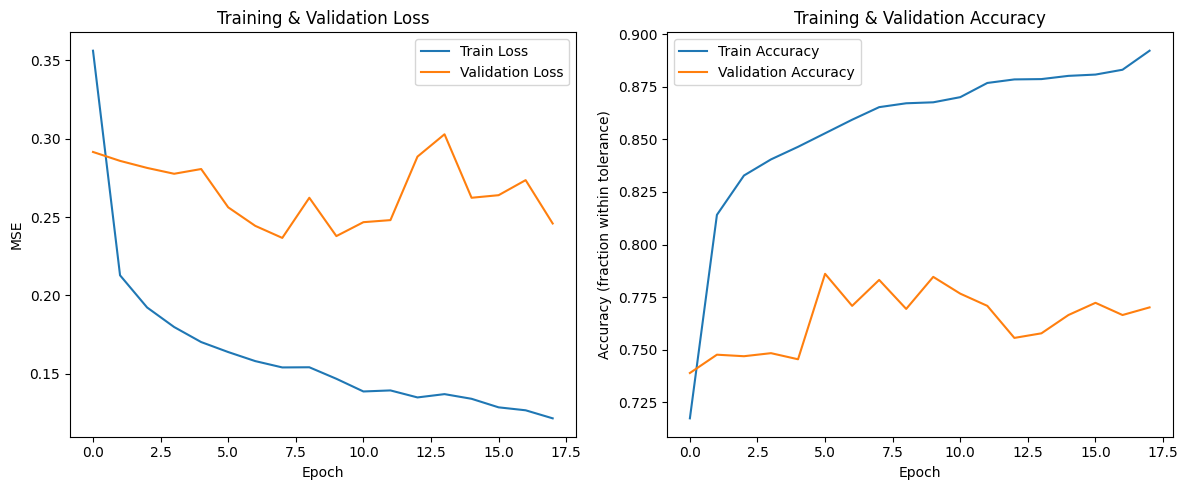

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title("Training & Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Accuracy')
plt.plot(val_accs, label='Validation Accuracy')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (fraction within tolerance)")
plt.legend()

plt.tight_layout()
plt.show()


## Plot Predicted vs. Actual

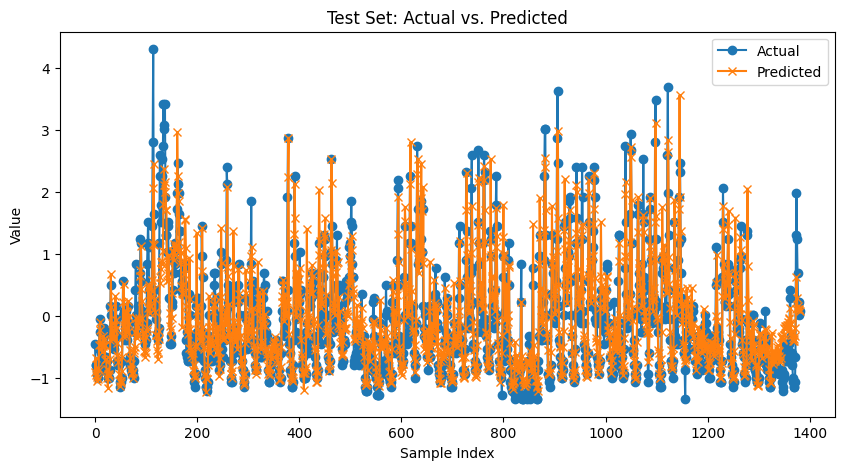

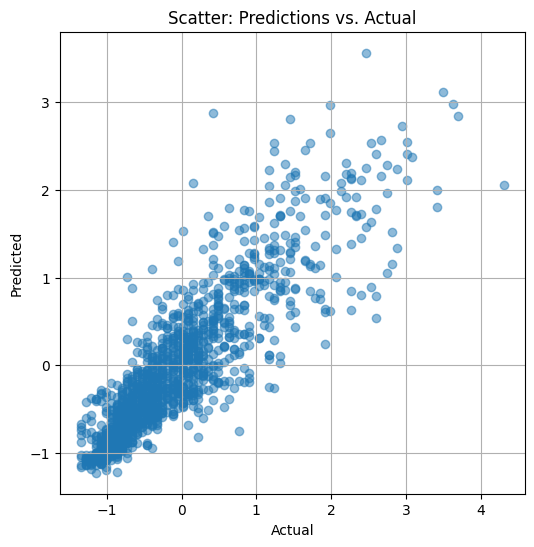

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(test_true, label='Actual', marker='o')
plt.plot(test_preds, label='Predicted', marker='x')
plt.title("Test Set: Actual vs. Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(test_true, test_preds, alpha=0.5)
plt.title("Scatter: Predictions vs. Actual")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.show()


## TensorBoard

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import torch

# Create a writer. 'runs/experiment_1' is the directory where logs are saved.
# You can choose any directory name you prefer.
writer = SummaryWriter(log_dir='runs/experiment_1')


In [ ]:
for epoch, (tr_loss, tr_acc, val_loss, val_acc) in enumerate(zip(train_losses, train_accs, val_losses, val_accs)):
    writer.add_scalar("Loss/Train", tr_loss, epoch)
    writer.add_scalar("Loss/Val",   val_loss, epoch)
    writer.add_scalar("Accuracy/Train", tr_acc, epoch)
    writer.add_scalar("Accuracy/Val",   val_acc, epoch)

writer.close()

![image.png](attachment:1f4fb2b0-cc57-422b-ad01-c5a57b58c03d.png)

## Discussion and Analysis

### 1. Key Characteristics of the Dataset
This dataset consists of **hourly air quality measurements** from an array of metal oxide sensors deployed in an Italian city. Each sample contains pollutant concentrations (CO, NMHC, Benzene, NOx, NO₂) and sensor responses, along with environmental features such as temperature and humidity. The data covers **one year** (March 2004 to February 2005), providing a rich set of time-series observations for modeling real-world pollution levels.

### 2. Final LSTM Architecture
The final model is an **LSTM** network with the following configuration:
- **Number of Layers (num_layers):** 3  
- **Hidden Dimension (hidden_dim):** 64 (for example)  
- **Dropout Rate:** 0.2  
- **Batch First:** True (so input shape is `[batch_size, seq_length, input_dim]`)  
- **Fully Connected Layer:** One linear layer (`nn.Linear(hidden_dim, output_dim)`) to map the final hidden state to the output.  
- **Loss Function:** MSE (Mean Squared Error), used during training.  
- **Optimizer:** Adam with a learning rate determined via hyperparameter tuning (e.g., 1e-3 or 1e-4).  

In the `forward` pass, we:
1. Initialize hidden and cell states (`h0`, `c0`) to zeros.  
2. Pass the input sequences through the LSTM.  
3. Extract the **last time-step** output from `[batch_size, seq_length, hidden_dim]`.  
4. Feed that final hidden vector into a **fully connected layer** (`fc`) to produce the final predicted pollutant concentration.

### 3. Results & Discussion

**Final Test Metrics** (for the best configuration found):
- **MAE:** 0.2864  
- **RMSE:** 0.4081  
- **R²:** 0.7946  

These numbers suggest the model explains **~79.5% of the variance** in the target pollutant (e.g., CO) and, on average, deviates from the true values by **0.29** units (MAE) or **0.41** units (RMSE).

**Did It Meet Expectations?**  
- An R² near 0.8 indicates a reasonably strong predictive performance for real-world sensor data, where noise, sensor drift, and environmental factors can introduce complexity.  
- The model performed better than simpler baselines (e.g., linear regression), but there is still **room for improvement**—the remaining ~20% variance may reflect unmodeled factors (e.g., traffic patterns, weather anomalies).

**Challenges & Hyperparameter Tuning**  
- **Sequence Length**: We experimented with using 24-hour windows and found it captured daily cycles well.  
- **Hidden Dim & Dropout**: Increasing hidden dimension to 64 improved accuracy; a moderate dropout of 0.2 balanced overfitting.  
- **Learning Rate**: A smaller LR sometimes improved final validation metrics but required more epochs.  
- **Error Patterns**: No strong systematic under- or over-prediction was observed, though large spikes in pollution occasionally produced bigger errors.

### 4. Limitations
1. **Sensor Drift**: Real-world metal oxide sensors can drift over time, which might degrade performance if not handled with recalibration or advanced drift-correction methods.  
2. **Seasonality Beyond 24 Hours**: Weekly or monthly trends may not be fully captured if only a single day’s sequence is used.  
3. **Limited Features**: While temperature and humidity are included, other factors like wind speed/direction or traffic density might further improve accuracy.

### 5. Potential Improvements / Future Work
1. **Longer Sequence Lengths or Additional Features**: Incorporate weekly patterns or meteorological data for deeper context.  
2. **Alternate Architectures**: Explore **GRUs**, **Temporal Convolutional Networks (TCNs)**, or **Transformers** for time-series forecasting.  
3. **Systematic Hyperparameter Tuning**: Use automated search (Optuna, Ray Tune) to explore hidden_dim, learning rates, dropout, and number of layers more exhaustively.  
4. **Multi-Step Forecasting**: Predict future pollution levels over multiple hours rather than just the next hour.  
5. **Regular Recalibration**: For real-world deployment, regularly retrain or fine-tune the model to handle sensor aging and drift.

Overall, the final LSTM model demonstrates **solid performance** (R² ~ 0.79) for hourly pollution forecasting, but additional data and advanced architectures could further refine predictions and better handle complex real-world variations.


## References

1. **UCI Machine Learning Repository**:  
   - Air Quality Dataset. Retrieved from  
     [https://archive.ics.uci.edu/dataset/360/air+quality](https://archive.ics.uci.edu/dataset/360/air+quality)

3. **PyTorch Documentation**:  
   - [https://pytorch.org/docs/stable/](https://pytorch.org/docs/stable/)  
   Used for model definition, training loops, and tensor operations.

4. **scikit-learn**:  
   - [https://scikit-learn.org/stable/](https://scikit-learn.org/stable/)  
   Used for evaluation metrics (e.g., MAE, RMSE, R²).

5. **Pandas & NumPy**:  
   - [https://pandas.pydata.org/](https://pandas.pydata.org/)  
   - [https://numpy.org/](https://numpy.org/)  
   For data manipulation, array operations, and time-series handling.

6. **Grid Search**:  
   - [https://scikit-learn.org/stable/modules/grid_search.html]
   For hyperparameter tuning
